<a href="https://colab.research.google.com/github/rifqol/studpen/blob/tugas-3/SC61416_Muhammad_Rifqi_Fadhilah_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dfnew = df.drop_duplicates()

dfnew.reset_index(drop= True, inplace= True)
dfnew.index += 1

dfnew

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# Imbalance Data

imbalance = dfnew['target'].value_counts()

#Mencari kelas mayoritas dan kelas minoritas dari jumlah penderita penyakit jantung
kelas_penderita = imbalance.idxmax()
kelas_bukanpenderita = imbalance.idxmin()

print("Kelas Mayoritas:", kelas_penderita)
print("Jumlah Sampel Kelas Mayoritas:",imbalance[kelas_penderita])
print("Kelas Minoritas:", kelas_bukanpenderita)
print("Jumlah Sampel Kelas Minoritas:", imbalance[kelas_bukanpenderita])

# Tidak dilakukan penyeimbangan karena hanya sedikit perbedaan pada data

Kelas Mayoritas: 1
Jumlah Sampel Kelas Mayoritas: 164
Kelas Minoritas: 0
Jumlah Sampel Kelas Minoritas: 138


# Model Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import train_test_split
x = df[df.columns[0:-1]]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_predict=model_dt.predict(x_test)
result_dt = pd.DataFrame({'Prediksi': y_predict, 'Real Value': y_test})
result_dt

,Prediksi,Real Value
595,0.0,0
601,0.0,0
847,0.0,0
959,1.0,1
937,0.0,0
...,...,...
617,1.0,1
468,1.0,1
268,0.0,0
145,0.0,0


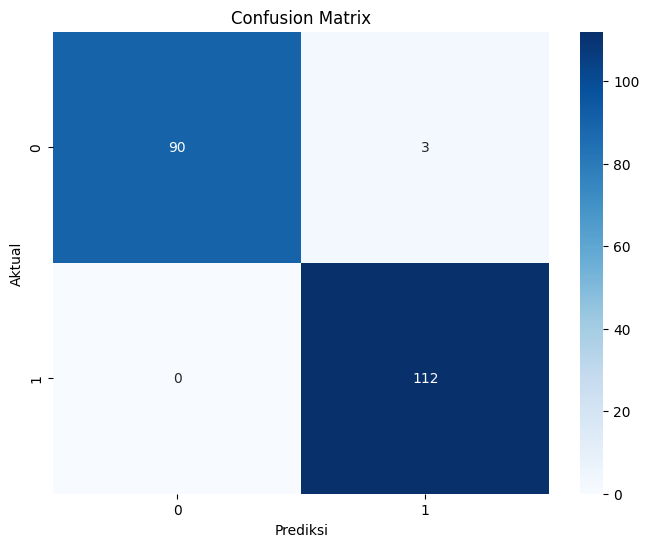

In [ ]:
from sklearn.metrics import confusion_matrix

# Ambang batas untuk mengonversi prediksi menjadi kategori
threshold = 0.5  # Misalnya, gunakan nilai tengah sebagai threshold

# Membuat prediksi menggunakan model Anda
prediksi = model_dt.predict(x_test)  # Gantilah X_test dengan data uji Anda

# Mengonversi prediksi menjadi kategori berdasarkan threshold
prediksi_kategori = (prediksi > threshold).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, prediksi_kategori)  # Gantilah y_true dengan label sebenarnya dari data uji Anda

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_dt, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')

# Konversi nilai MAE menjadi positif
mae_scores = -scores

# Hitung rata-rata skor MAE
avg_mae = np.mean(mae_scores)

print("Cross-Validation Scores (MAE):", mae_scores)
print("Average MAE:", avg_mae)

Cross-Validation Scores (MAE): [0.01219512 0.02439024 0.         0.         0.01219512 0.
 0.03658537 0.         0.         0.        ]
Average MAE: 0.00853658536585366


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print("Akurasi Decision Tree:", accuracy)

Akurasi Decision Tree: 0.9853658536585366


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_predict)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.97      1.00      0.99       112

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE: ',mean_absolute_error(y_test,y_predict))

MAE:  0.014634146341463415


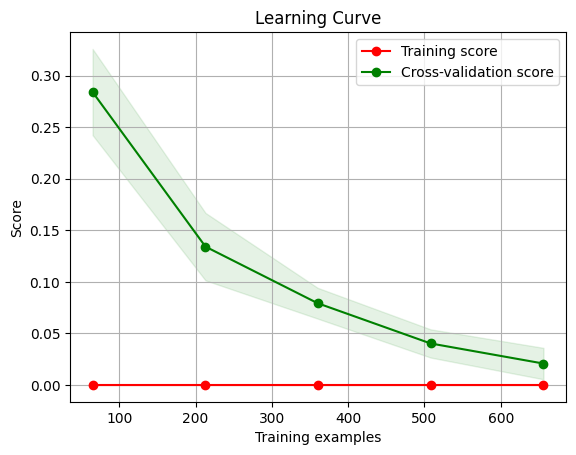

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, x, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_absolute_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Gunakan plot_learning_curve untuk melihat learning curve model
plot_learning_curve(model_dt, x_train, y_train, cv=5, n_jobs=-1)

plt.show()

# Model Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x = df[df.columns[0:-1]]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tentukan hyperparameters yang ingin Anda coba
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data pelatihan
grid_search.fit(x_train, y_train)

# Print parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Melakukan prediksi menggunakan model terbaik
y_predict = best_model.predict(x_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_predict)
print("Akurasi model terbaik:", accuracy)


Parameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi model terbaik: 1.0


In [ ]:
# Inisialisasi model Decision Tree Classifier
# model_dt = DecisionTreeClassifier()

# Melatih model Decision Tree Classifier
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict=model_dt.predict(x_test)
result_dt = pd.DataFrame({'Prediksi': y_predict, 'Real Value': y_test})
result_dt

,Prediksi,Real Value
506,0,0
712,1,1
266,0,0
407,0,0
606,0,0
...,...,...
490,1,1
816,1,1
803,0,0
950,0,0


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


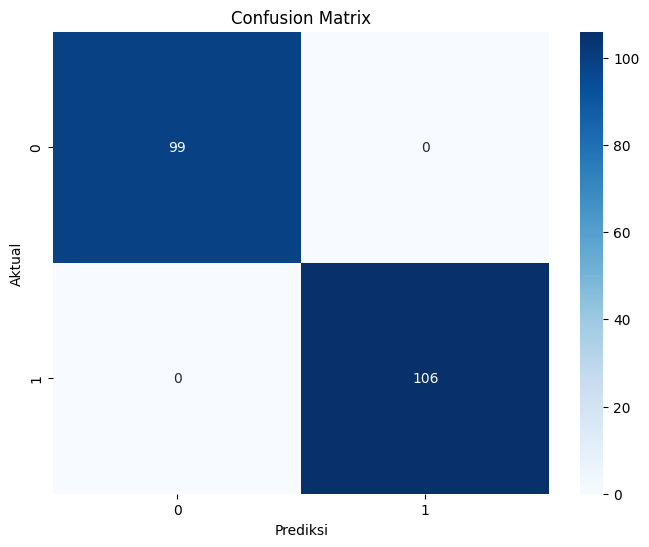

In [ ]:
from sklearn.metrics import confusion_matrix

# Ambang batas untuk mengonversi prediksi menjadi kategori
threshold = 0.5  # Misalnya, gunakan nilai tengah sebagai threshold

# Membuat prediksi menggunakan model Anda
prediksi = model_dt.predict(x_test)  # Gantilah X_test dengan data uji Anda

# Mengonversi prediksi menjadi kategori berdasarkan threshold
prediksi_kategori = (prediksi > threshold).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, prediksi_kategori)  # Gantilah y_true dengan label sebenarnya dari data uji Anda

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

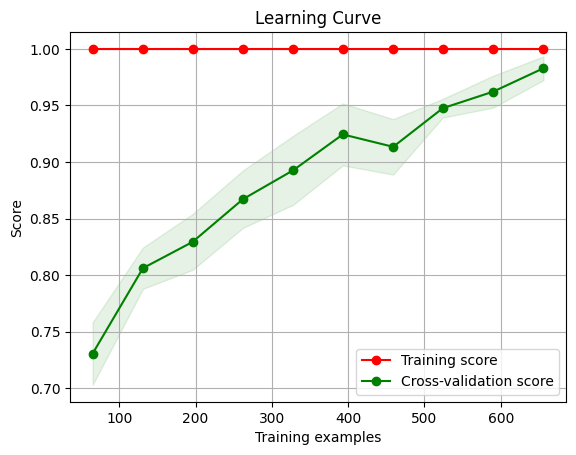

In [ ]:
from sklearn.model_selection import learning_curve
plot_learning_curve(model_dt, x_train, y_train, x_test, y_test)
plt.show()

# Model Logistic Regression

soal nomor 2, alasan saya menggunakan model logistic regresssion adalah karena memiliki learning curve yang bagus karena dengan keterbatasan dataset sehingga logistic regression adalah pilihan terbaik menurut saya. saya sudah mencoba dengan model decision tree untuk akurasi bagus akan tetapi learning curvenya overfit yang menandakan modelnya tidak cocok dengan dataset yang saya punya.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
x = dfnew.drop('target', axis=1)
y = dfnew['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [ ]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi terhadap data training
x_train_normal = scaler.fit_transform(x_train)

# Normalisasi data testing dengan scaler yang sama
x_test_normal = scaler.transform(x_test)

In [ ]:
model_lr = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='saga')

# Latih model menggunakan data pelatihan
model_lr.fit(x_train_normal, y_train)

# Prediksi kelas menggunakan data pengujian
predictions = model_lr.predict(x_test_normal)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9016393442622951


In [ ]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
result

,Actual,Predicted
19,1,1
113,1,1
103,1,1
234,1,0
93,0,0
...,...,...
288,1,1
147,0,0
261,0,0
168,1,0


In [ ]:
model_lr = LogisticRegression(max_iter=100)
# Menggunakan cross-validation dengan metrik akurasi
accuracy_scores = cross_val_score(model_lr, x_train_normal, y_train, cv=5, scoring='accuracy')

# Hitung rata-rata skor akurasi
avg_accuracy = np.mean(accuracy_scores)

print("Cross-Validation Scores (Accuracy):", accuracy_scores)
print("Average Accuracy:", avg_accuracy)

Cross-Validation Scores (Accuracy): [0.75510204 0.83333333 0.83333333 0.75       0.8125    ]
Average Accuracy: 0.7968537414965986


Soal nomor 5: Hasil "Cross-Validation Scores (Accuracy)" yang Anda berikan menunjukkan performa model Logistic Regression pada setiap lipatan dalam validasi silang. Terdapat lima nilai akurasi yang mewakili performa model pada masing-masing lipatan. Misalnya, nilai 0.75510204 menunjukkan akurasi pada lipatan pertama, 0.83333333 pada lipatan kedua, dan seterusnya. Nilai "Average Accuracy" sebesar 0.7968537414965986 merupakan rata-rata dari semua skor akurasi tersebut. Hal ini mengindikasikan bahwa secara keseluruhan, model Logistic Regression memiliki akurasi sekitar 79.69% dalam melakukan klasifikasi pada data yang tidak terlihat.

In [ ]:
def plot_learning_curve(model, x_train, y_train, x_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model_lr, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

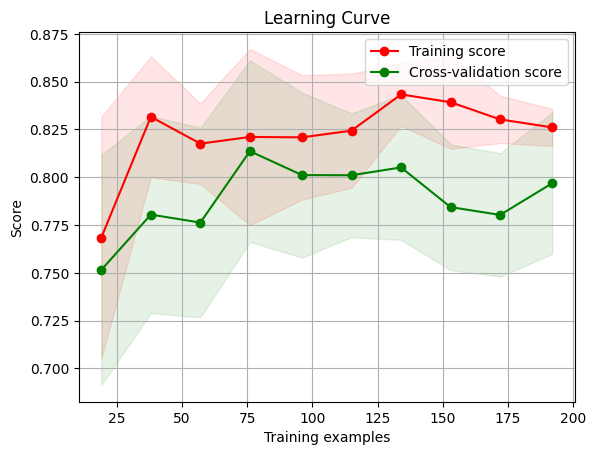

In [ ]:
plot_learning_curve(model_lr, x_train_normal, y_train, x_test_normal, y_test)
plt.show()

Soal nomor 7: Berdasarkan gambar, Learning curve menunjukkan performa model saat dilatih dengan data.  Skor training meningkat menunjukkan model belajar dari data, namun skor validasi silang yang menurun menunjukkan potensi overfitting.

In [ ]:
# Tentukan rentang nilai hyperparameter yang ingin Anda jelajahi
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l2' or 'none'],
              'solver': ['saga', 'lbfgs'],
              'max_iter': [200, 250, 1000]
              }

# Tentukan metrik evaluasi
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Lakukan Grid Search
grid_search = GridSearchCV(model_lr, param_grid, scoring=scoring, cv=5)
grid_search.fit(x_train_normal, y_train)

# Dapatkan kombinasi hyperparameter terbaik
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluasi model dengan kombinasi hyperparameter terbaik
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test_normal, y_test)
print("Accuracy of the best model:", accuracy)


Best hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Accuracy of the best model: 0.9016393442622951


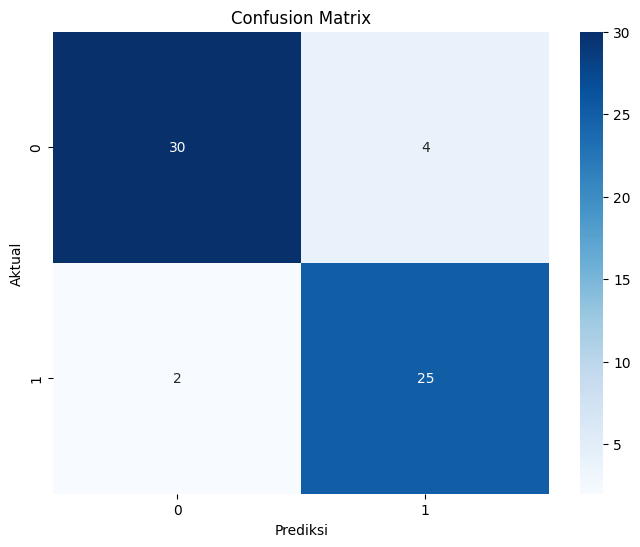

In [ ]:
# Ambang batas untuk mengonversi prediksi menjadi kategori
threshold = 0.5  # Misalnya, gunakan nilai tengah sebagai threshold

# Membuat prediksi menggunakan model Anda
prediksi = model_lr.predict(x_test_normal)  # Gantilah X_test dengan data uji Anda

# Mengonversi prediksi menjadi kategori berdasarkan threshold
prediksi_kategori = (prediksi > threshold).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, prediksi_kategori)  # Gantilah y_true dengan label sebenarnya dari data uji Anda

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan hasil confusion matrix, model memiliki akurasi yang tinggi (90.2%) dan presisi yang cukup tinggi (83.3%). Model juga memiliki recall yang sangat tinggi (92.6%), menunjukkan bahwa model sangat baik dalam mengidentifikasi data positif.

# Kesimpulan

Setelah melakukan observasi model yang paling baik di gunakan untuk dataset ini adalah model mogistic regression walaupun akurasinya di bawah decision tree tetapi learning curve model logistic regression lebih baik yang dimana itu menandakan kecocokan model dengan dataset.